In [1]:
import joblib
import matplotlib.pyplot as plt

In [23]:
data_set=joblib.load("../src/data/preplan.z")
data_f=joblib.load("../real_coords1.z")

In [24]:
sx,sy=data_set["x"],data_set["y"]
cx,cy=data_f["x"],data_f["y"]


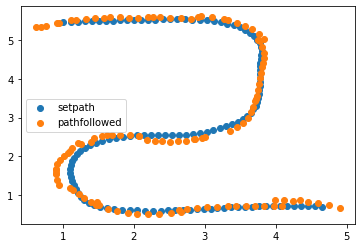

In [25]:
plt.scatter(sx,sy,label="setpath")
plt.scatter(cx,cy,label="pathfollowed")
plt.legend()
plt.savefig("trajectory.png")

In [28]:
class PID:
    """
    Discrete PID control
    """

    def __init__(self, P=1.0, I=0.1, D=0.2, Derivator=0, Integrator=0, Integrator_max=0.3, Integrator_min=-0.3):

        self.Kp = P
        self.Ki = I
        self.Kd = D
        self.Derivator = Derivator
        self.Integrator = Integrator
        self.Integrator_max = Integrator_max
        self.Integrator_min = Integrator_min

        # self.set_point=0.0
        self.error = 0.0

    def update(self, error):
        """
        Calculate PID output value for given reference input and feedback
        """

        self.error = error

        self.P_value = self.Kp * self.error
        self.D_value = self.Kd * (self.error - self.Derivator)
        self.Derivator = self.error

        self.Integrator = self.Integrator + self.error

        if self.Integrator > self.Integrator_max:
            self.Integrator = self.Integrator_max
        elif self.Integrator < self.Integrator_min:
            self.Integrator = self.Integrator_min

        self.I_value = self.Integrator * self.Ki

        PID = self.P_value + self.I_value + self.D_value

        return PID

    def setPoint(self, set_point):
        """
        Initilize the setpoint of PID
        """
        self.set_point = set_point
        self.Integrator = 0
        self.Derivator = 0

    def setIntegrator(self, Integrator):
        self.Integrator = Integrator

    def setDerivator(self, Derivator):
        self.Derivator = Derivator

    def setKp(self, P):
        self.Kp = P

    def setKi(self, I):
        self.Ki = I

    def setKd(self, D):
        self.Kd = D

    def getError(self):
        return self.error

    def getIntegrator(self):
        return self.Integrator

    def getDerivator(self):
        return self.Derivator

    
def get_error_lane(mask_image):
    mid_y=(mask_image.shape[0]//2)
    pval=int(mid_y+0.6*(mask_image.shape[0]//2))
    mval=int(mid_y+ 0.8*(mask_image.shape[0]//2))
    # print(pval,mval)
    img_new=mask_image[pval:mval,:]
    img_new=cv2.resize(img_new,None,fx=0.35,fy=0.35,interpolation = cv2.INTER_NEAREST)
    # plt.plot(img_new)
    print(img_new.shape)
    histogram = np.sum(img_new[img_new.shape[0] // 2 :, :], axis=0)  # noqa
    plt.plot(histogram)
    midpoint = np.int(histogram.shape[0] / 2)
    leftxBase = np.argmax(histogram[:midpoint])
    rightxBase = np.argmax(histogram[midpoint:]) + midpoint
    print(leftxBase,midpoint,rightxBase)
    return (abs(rightxBase-midpoint)-abs(leftxBase-midpoint))*26.5/(midpoint)



In [29]:
#at init
pidobj=PID()

#compute output 
outangle=get_error_lane(mask_image)

# at output
output=pidobj.update(outangle)

NameError: name 'mask_image' is not defined